# Projeto de Análise de Dados de Filmes

# Obter dados da API

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

api_key = 'sua_chave_de_api'
base_url = 'https://api.themoviedb.org/3'
endpoint = '/discover/movie'
params = {'api_key': api_key, 'sort_by': 'popularity.desc'}

response = requests.get(base_url + endpoint, params=params)
data = response.json()
movies = data['results']

Criar DataFrame e Limpeza dos Dados

In [2]:
df = pd.DataFrame(movies)
df = df[['title', 'release_date', 'vote_average', 'vote_count', 'popularity']]
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

# Avaliação Média ao Longo dos Anos

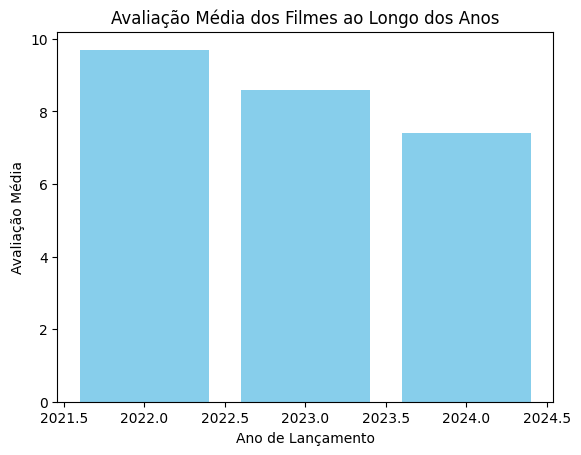

In [3]:
plt.bar(df['release_year'], df['vote_average'], color='skyblue')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação Média')
plt.title('Avaliação Média dos Filmes ao Longo dos Anos')
plt.show()

# Distribuição da Avaliação Média

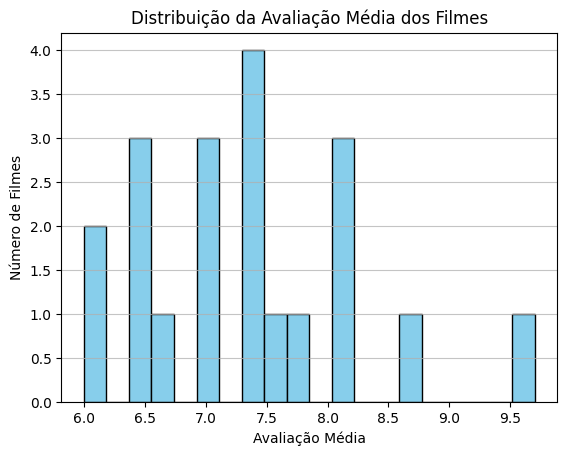

In [4]:
plt.hist(df['vote_average'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Avaliação Média dos Filmes')
plt.xlabel('Avaliação Média')
plt.ylabel('Número de Filmes')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Gráfico de Barras com Nomes dos Filmes

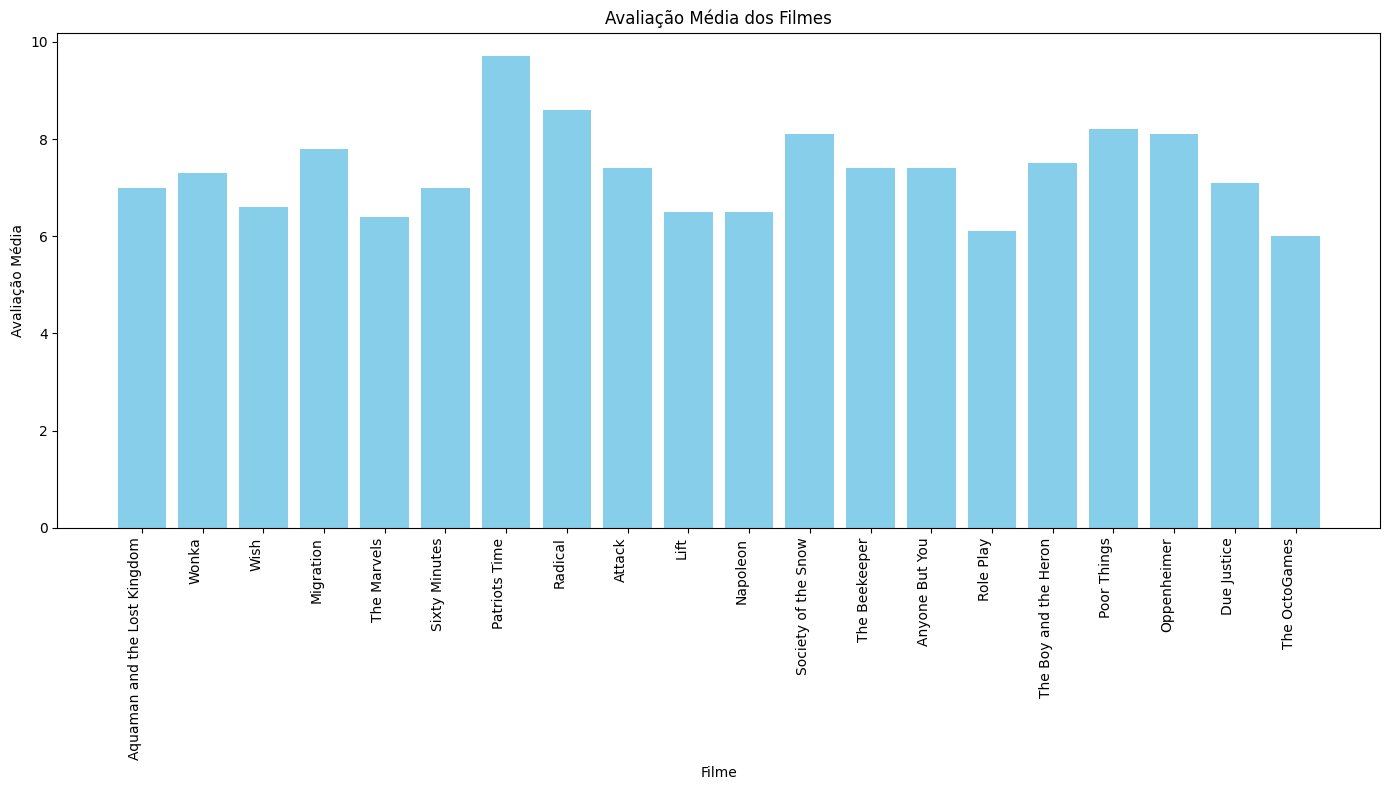

In [5]:
plt.figure(figsize=(14, 8))
plt.bar(df['title'], df['vote_average'], color='skyblue')
plt.title('Avaliação Média dos Filmes')
plt.xlabel('Filme')
plt.ylabel('Avaliação Média')
plt.xticks(rotation=90, ha='right')  # Rotação dos nomes para melhor leitura
plt.tight_layout()
plt.show()


In [6]:
correlation = df['popularity'].corr(df['vote_average'])
print(f"Correlação entre popularidade e avaliação média: {correlation}")

Correlação entre popularidade e avaliação média: -0.11036351081323764
